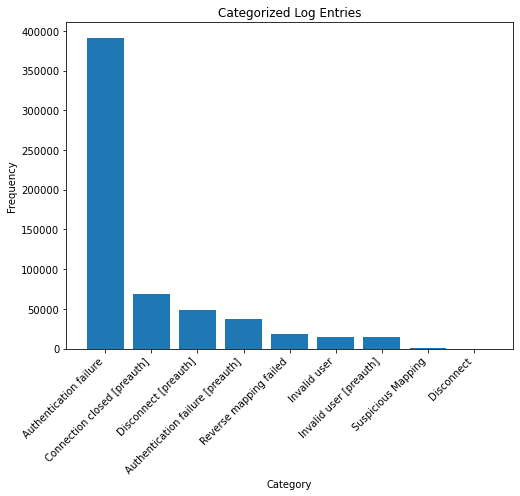

Sequential execution time: 4.76 seconds


In [2]:
import re
import matplotlib.pyplot as plt
import time

#unknown_entries = []

def process_log_sequential(log_file_path):
    intrusion_signs = []
    category_ips = {}
    consecutive_failures = []
    with open(log_file_path, "r") as log_file:
        for line in log_file:
            log_entry = line.strip()
            category, ip = categorize_log_entry(log_entry)
            if category != "Unknown":
                intrusion_signs.append(category)
            if category == "Authentication failure" or category == "Invalid user":
                consecutive_auth_failures = find_consecutive_failures(ip)
                if consecutive_auth_failures is not None:
                    category_ips[category] = category_ips.get(category, set())
                    category_ips[category].add(consecutive_auth_failures[0])
                    consecutive_failures.clear()
    category_counts = {}
    for category in intrusion_signs:
        category_counts[category] = category_counts.get(category, 0) + 1
    sorted_categories = sorted(category_counts, key=category_counts.get, reverse=True)
    sorted_sizes = [category_counts[category] for category in sorted_categories]
    plt.figure(figsize=(8, 6))
    plt.bar(sorted_categories, sorted_sizes)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.title('Categorized Log Entries')
    plt.show()

def suspicious_activity_sequential(ip_path):
    with open(ip_path, "w") as ip_file:
     for category, ips in category_ips.items():
            for ip in ips:
                ip_file.write(category + " more then 3 times: " + ip + "\n")

def categorize_log_entry(log_entry):
    ip_match = re.search(r"\b(?:\d{1,3}\.){3}\d{1,3}\b", log_entry) 
    ip = ip_match.group(0) if ip_match else None  
    
    if "Connection closed" in log_entry and "[preauth]" in log_entry:
        return "Connection closed [preauth]", ip
    elif ("Invalid user" in log_entry or "input_userauth_request" in log_entry) and "[preauth]" in log_entry:
        return "Invalid user [preauth]", ip
    elif ("authentication failure" in log_entry or "Failed password" in log_entry) and "[preauth]" in log_entry:
        return "Authentication failure [preauth]", ip
    elif "Received disconnect" in log_entry and "[preauth]" in log_entry:
        return "Disconnect [preauth]", ip
    elif "reverse mapping" in log_entry and "[preauth]" in log_entry:
        return "Reverse mapping failed [preauth]", ip
    elif "not map back to the address" in log_entry:
        return "Suspicious Mapping", ip
    elif "Connection closed" in log_entry:
        return "Connection closed", ip
    elif "Invalid user" in log_entry or "input_userauth_request" in log_entry:
        return "Invalid user", ip
    elif "authentication failure" in log_entry or "Failed password" in log_entry:
        return "Authentication failure", ip
    elif "Received disconnect" in log_entry:
        return "Disconnect", ip
    elif re.search(r"Failed [0-9]+ attempts", log_entry):
        return "Suspicious activity", ip
    elif "reverse mapping" in log_entry:
        return "Reverse mapping failed", ip
    else:
        return "Unknown", ip


def find_consecutive_failures(ip):
    consecutive_failures.append(ip)
    if len(consecutive_failures) == 3 and len(set(consecutive_failures)) == 1: #set crea una lista di elementi unici. Se la lista = 1 significa che gli IP sono tutti e 3 uguali
        return consecutive_failures
    if len(consecutive_failures) == 3:
        consecutive_failures.pop(0)
    if len(set(consecutive_failures)) > 1:
        consecutive_failures.clear()
    return None 

ip_path = "C:\\Users\\Empir\\Desktop\\ip.txt"
log_file_path = "C:\\Users\\Empir\\Desktop\\SSH.log"
intrusion_signs = []
category_ips = {}
consecutive_failures = []  

# Sequential Processing
start_time = time.time()
process_log_sequential(log_file_path)
suspicious_activity_sequential(ip_path)
end_time = time.time()
execution_time = end_time - start_time
print("Sequential execution time: {:.2f} seconds".format(execution_time))
